In [1]:
%matplotlib inline
import warnings

warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import mdtraj as md

In [2]:
dt_ps = 0.1
dt = dt_ps/1000

In [3]:
def get_trajectory(traj_path, top_path):
    
    traj = md.load(traj_path,top=top_path)

    com = md.compute_center_of_mass(traj)

    df = pd.DataFrame(com, columns=['x', 'y', 'z'])
    df['t'] = traj.time/1000 # Gromacs trajectories are in picoseconds - we want nanoseconds 
    
    return df

In [4]:
def get_csv_trajectory(traj_path, top_path=None):
    df = pd.read_csv(traj_path, header=None, names=['t', 'x', 'y', 'z'])
    df['t'] /= 1000 
    return df

## Cluster trajectories 

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [17]:
frozen_151 = get_csv_trajectory('data/4_151ns_com_positions.csv')
frozen_152 = get_csv_trajectory('data/4_152ns_com_positions.csv')
unfrozen = get_trajectory('data/traj_4.xtc', 'data/traj_4.pdb')
unfrozen = unfrozen.loc[(unfrozen['t']>150) & (unfrozen['t']<153), :]


In [30]:
dt = round(unfrozen.iloc[1,-1] - unfrozen.iloc[0, -1], 4)
dt

1e-04

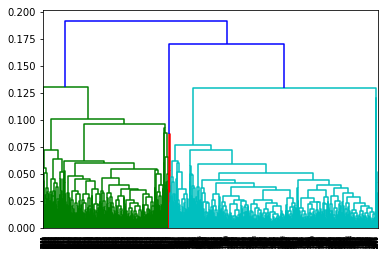

In [23]:
stride=10
Z_unfrozen = linkage(unfrozen.iloc[::stride, :3], method='average', metric='euclidean')
_ = dendrogram(Z_unfrozen, labels=None)

In [45]:
unfrozen_labels = fcluster(Z_unfrozen, criterion='distance', t=0.175)

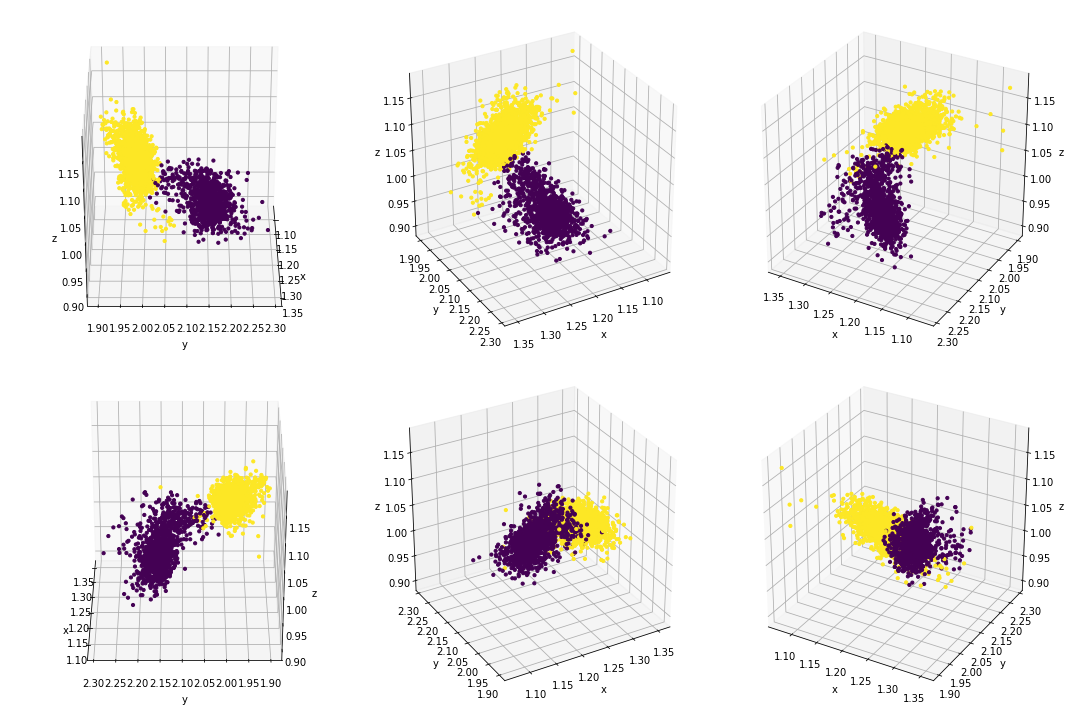

In [46]:
fig = plt.figure(figsize=(15,10))
for i in range(6):
    ax = fig.add_subplot(2,3,i+1,projection='3d')
    x = unfrozen.iloc[::stride, 0]
    y = unfrozen.iloc[::stride, 1]
    z = unfrozen.iloc[::stride, 2]
    ax.scatter(xs=x, ys=y, zs=z, c=unfrozen_labels, s=10, alpha=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(azim=60*i)
plt.tight_layout()

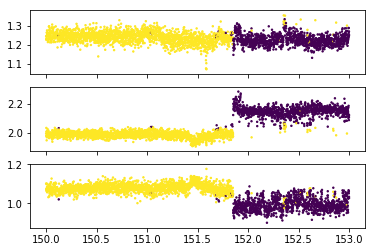

In [47]:
fig, axes = plt.subplots(3, sharex=True)
for i, ax in enumerate(axes):
    ax.scatter(unfrozen.iloc[::stride, -1], unfrozen.iloc[::stride, i ], c=unfrozen_labels,
              alpha=1, s=2)